In [1]:
import numpy as np
from numpy import asarray
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras import layers, models

In [2]:
normal_data = pd.read_csv(os.getcwd() + '/Data/brain_tumour_normalized.csv')
normal_data.tail()

,Image,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
3757,Image3758,0.637968,0.414697,0.632375,0.159764,0.005595,0.000515,0.045938,0.346817,0.138519,0.541004,0.166894,0.911473,0.993164,0
3758,Image3759,0.613869,0.420991,0.637400,0.167358,0.007379,0.000687,0.046743,0.356137,0.145293,0.563092,0.162157,0.915507,0.993164,0
3759,Image3760,0.540777,0.395000,0.616399,0.171507,0.012051,0.001197,0.048510,0.361445,0.149223,0.548288,0.162914,0.914218,0.993164,0
3760,Image3761,0.399615,0.324199,0.555410,0.220979,0.024163,0.002789,0.065284,0.419145,0.195282,0.530986,0.212132,0.888606,0.993164,0
3761,Image3762,0.181883,0.164316,0.386296,0.297948,0.063479,0.009941,0.069852,0.498261,0.268390,0.551213,0.224934,0.883686,1.000000,0


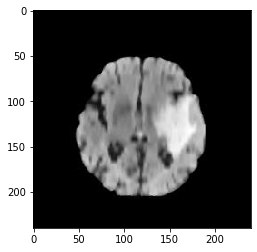

In [3]:
import PIL
from PIL import Image
# Open the image form working directory
image = Image.open(os.getcwd() + '/Data/Images/Image3.jpg')
plt.imshow(image)
plt.show()

In [4]:
#converting all images into numpy arrays and storing them into a list
img_list = []
for i in range(1, len(normal_data)+1):
    image = Image.open(os.getcwd() + '/Data/Images/Image'+str(i)+'.jpg')
    data = asarray(image)
    img_list.append(data)

In [5]:
#storing image data as well as class in a dataframe
images = pd.DataFrame()
images["Image"] = normal_data["Image"]
images["Array"] = img_list
images["Class"] = normal_data["Class"]
images.head()

,Image,Array,Class
0,Image1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
1,Image2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
2,Image3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
3,Image4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
4,Image5,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0


In [6]:
#dataset split
X_train, X_test, Y_train, Y_test = train_test_split(images["Array"], images["Class"], test_size = 0.2, random_state = 1)
X_train.head

<bound method NDFrame.head of 1607    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1678    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1520    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1805    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
946     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
                              ...                        
2763    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
905     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1096    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
235     [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
1061    [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...
Name: Array, Length: 3009, dtype: object>

In [7]:
X_train[0].shape

(240, 240, 3)

In [8]:
#normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
#creating cnn
cnn = models.Sequential([
    layers.Conv2D(filters=240, kernel_size=(3, 3), activation='relu', input_shape=(240, 240, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=480, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [10]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
cnn.fit(X_train, Y_train, epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).